In [1]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 32.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 27.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.26.4 scikit-learn==1.5.0 joblib==1.4.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 19.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.1 MB/s eta 0:00:0000:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/4 [numpy]
      Successfully uninstalled numpy-2.2.6━━━━━━━━━━━━━━━━━━━━ 1/4 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
# pip install pandas

In [5]:
df=pd.read_csv("california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


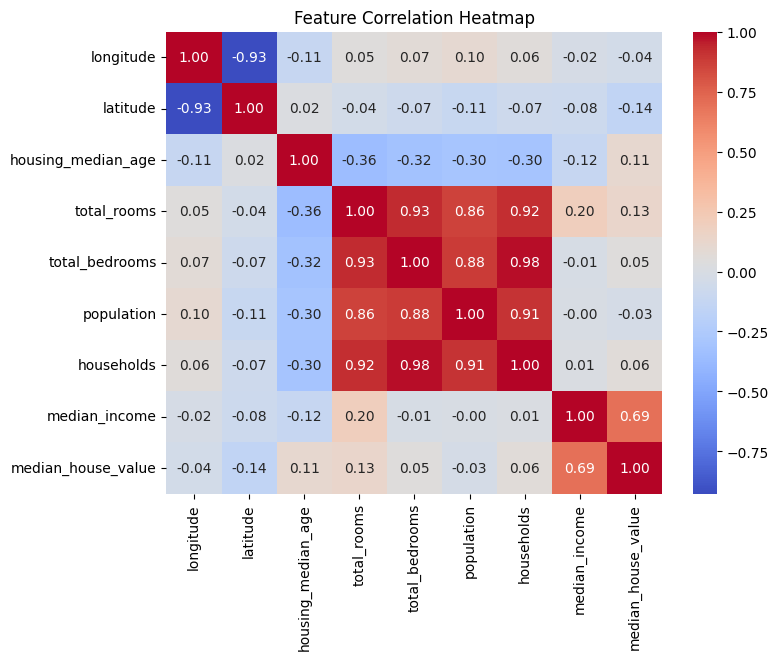

In [7]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
# df.info()
# df.shape


In [9]:
# df.drop(columns=['longitude', 'latitude','total_bedrooms', 'population','households'],axis=1, inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [27]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [10]:
df_copy=df.copy()
for col in df.columns:
    if col=='median_house_value':
        continue

    mean_df=df[col].mean()
    std_df=df[col].std()
    lower_bound= mean_df-3*std_df
    upper_bound=mean_df+3*std_df
    filtered_df=df[(df[col]>lower_bound)&(df[col]<upper_bound)]
    # filtered_df.info()

In [11]:
filtered_df.shape

(16714, 9)

In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [13]:
x=df.drop(columns=['median_house_value'],axis=1)
x.shape

(17000, 8)

In [14]:
y=df['median_house_value']


In [15]:
# pip install scikit-learn

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x_train)




In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(scaled_x,y_train)

LinearRegression()

In [20]:
scaled_x_test=scaler.transform(x_test)
predicted_median_price=model.predict(scaled_x_test)
# print(predicted_median_price)

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
mse_score=mean_squared_error(y_test,predicted_median_price)
print(f'The mse_score is: {mse_score: .2f}')

model_r2_score=r2_score(y_test,predicted_median_price)
print(f'The model_r2_score is: {model_r2_score: .2f}')

The mse_score is:  4840403343.05
The model_r2_score is:  0.63


In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr_model=RandomForestRegressor()
rfr_model.fit(scaled_x,y_train)

RandomForestRegressor()

In [32]:
!pip install numpy
import numpy as np

In [34]:
x={'data':[0.1,0.2,0.2,4,5,6,7,6]}
data=x['data']
scaler.transform([data])


/anaconda/envs/jupyter_env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 59.65549598, -16.52785827,  -2.25078185,  -1.22041   ,
         -1.26997976,  -1.27372448,  -1.28751574,   1.10414362]])

In [36]:
output=rfr_model.predict([data])

In [23]:
predict_rfr_median_price=rfr_model.predict(scaled_x_test)
print(predict_rfr_median_price)

[131150.   186318.   244903.   ... 123404.   270781.   323939.02]


In [24]:
from sklearn.metrics import mean_squared_error,r2_score
mse_score=mean_squared_error(y_test,predict_rfr_median_price)
print(f'The mse_score is: {mse_score: .2f}')

model_r2_score=r2_score(y_test,predict_rfr_median_price)
print(f'The model_r2_score is: {model_r2_score: .2f}')

The mse_score is:  2332647413.50
The model_r2_score is:  0.82


In [25]:
import joblib
rfrmodel=joblib.dump(rfr_model,'Trained_model.pkl')
scaler_model=joblib.dump(scaler,'scaler_model.pkl')

In [ ]:
import urllib.request
import json

# Request data goes here
# The example below assumes JSON formatting which may be updated
# depending on the format your endpoint expects.
# More information can be found here:
# https://docs.microsoft.com/azure/machine-learning/how-to-deploy-advanced-entry-script
data = {
  "data": [
    [12, 45, 3.5, 1, 0, 7.8, 2.2, 9]]
}

body = str.encode(json.dumps(data))

url = "https://newendpoint1.westus3.inference.ml.azure.com/score"
# Replace this with the primary/secondary key, AMLToken, or Microsoft Entra ID token for the endpoint
api_key = ''
if not api_key:
    raise Exception("A key should be provided to invoke the endpoint")


headers = {'Content-Type':'application/json', 'Accept': 'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

b'{"predictions": [380801.39]}'
